# Logistic Regression


In this notebook implement binary logistic regression from scratch in **`Python`/`Numpy`**. We first generate a two-class dataset. Then derive gradient of the cross-entropy loss. Finally, we implement and test our logistic regression algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

## 1. Generate a Sample Dataset

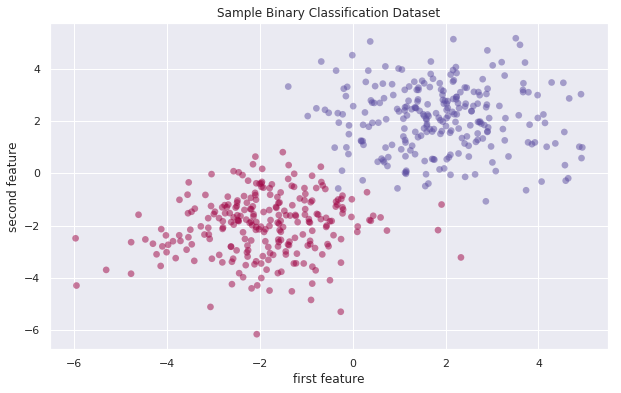

In [5]:
N = 250
np.random.seed(1024)

mean_cls_0 = np.array([-2, -2])
cov_cls_0 = np.array([[1.5, 0], [0, 1.5]])
x0 = np.random.multivariate_normal(mean=mean_cls_0, cov=cov_cls_0, size=N)
y0 = np.zeros(N)

mean_cls_1 = np.array([2, 2])
cov_cls_1= np.array([[1.5, 0], [0, 1.5]])
x1 = np.random.multivariate_normal(mean=mean_cls_1, cov=cov_cls_1, size=N)
y1 = np.ones(N)

X_train = np.row_stack((x0, x1))
y_train = np.concatenate((y0, y1))

fig = plt.figure(figsize=(10, 6))
axes = plt.axes()
axes.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=45, cmap=plt.cm.Spectral, alpha=0.5, edgecolors='none')
axes.set_xlabel('first feature')
axes.set_ylabel('second feature')
axes.set_title('Sample Binary Classification Dataset')
plt.show()

## 2. Derive Gradient

In logistic regression we use sigmoid function to squashe responses between zero and one. Hence, we can writedown following probability values.

$$P(t_n = 1|\mathbf{x_n}, \mathbf{w}) = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}_n}}$$
$$P(t_n = 0|\mathbf{x_n}, \mathbf{w}) = \frac{e^{-\mathbf{w}^T\mathbf{x}_n}}{1 + e^{-\mathbf{w}^T\mathbf{x}_n}}$$

Let $\mathbf{t} = (t_1, t_2, ..., t_N)$ and $\mathbf{X} = (\mathbf{x_1}, \mathbf{x_2}, ..., \mathbf{x_N})$ denote full training dataset and data is coming from a i.i.d. distribution, we can write the folloing likelihood.


$$P(\mathbf{t}|\mathbf{X}, \mathbf{w}) = \prod_{n=1}^{N}\bigg[P(t_n = 1|\mathbf{x_n}, \mathbf{w})^{t_n}P(t_n = 0|\mathbf{x_n}, \mathbf{w})^{(1-t_n)}\bigg]$$

So our objective is find $\mathbf{w}$ in order to maximize above equation. We can further simplfy our optimization function by using $log()$. Further, it will not chage the value of \mathbf{w}. Also, instead of maximuxing above function, we minimize $-P(\mathbf{t}|\mathbf{X}, \mathbf{w})$. So our new objective function is:

$$-P(\mathbf{t}|\mathbf{X}, \mathbf{w}) = \sum_{n=1}^{N}-\bigg[log(P(t_n = 1|\mathbf{x_n}, \mathbf{w})^{t_n}) + log(P(t_n = 0|\mathbf{x_n}, \mathbf{w})^{(1-t_n)})\bigg]$$
$$-P(\mathbf{t}|\mathbf{X}, \mathbf{w}) = \sum_{n=1}^{N}-\bigg[{t_n}log(P(t_n = 1|\mathbf{x_n}, \mathbf{w})) + (1-t_n)log(P(t_n = 0|\mathbf{x_n}, \mathbf{w}))\bigg]$$

Now let me introduce a new notations:
$$\sigma_n = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}_n}}$$
$$1 - \sigma_n = \frac{e^{-\mathbf{w}^T\mathbf{x}_n}}{1 + e^{-\mathbf{w}^T\mathbf{x}_n}}$$

$$-P(\mathbf{t}|\mathbf{X}, \mathbf{w}) = \sum_{n=1}^{N}-\bigg[{t_n}log(\sigma_n) + (1-t_n)log(1-\sigma_n)\bigg]$$

It is easy to show that $\frac{\partial \sigma_n}{\partial \mathbf{w}} = \sigma_n(1 -\sigma_n)\mathbf{w}$ and $\frac{\partial (1- \sigma_n)}{\partial \mathbf{w}} = -\frac{\partial \sigma_n}{\partial \mathbf{w}}$. By substitting these two equations and taking the derivatives we can show that:

$$-P(\mathbf{t}|\mathbf{X}, \mathbf{w}) = \sum_{n=1}^{N}(\sigma_n - t_n)\mathbf{x_n}$$

Now we have everything we need to implement our own Logistic Regression classifier.

## 3. Implementation

In [33]:
class LigisticRegression:
    def __init__(self, learning_rate=1e-3, max_iter=250):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        
        self.weight = None
        
    def fit(self, X_train, y_train):
        pass
    
    def predict(self, X_test):
        pass
    
    def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

    def calculate_nll(X_train, y_train, weights):
        cost = 0.0    
        for n in range(len(y_train)):
            cost += -1*((y_train[n]*np.log(sigmoid(np.inner(X_train[n, :], weights)))) + \
                     ((1 -y_train[n])*np.log(1 - sigmoid(np.inner(X_train[n, :], weights)))))
        return cost

    def calculate_derivative(X_train, y_train, weights):
        grad = np.zeros(X_train.shape[1])
        for n in range(len(y_train)):
            grad += (sigmoid(np.inner(X_train[n, :], weights)) - y_train[n])* X_train[n, :]
        return grad    